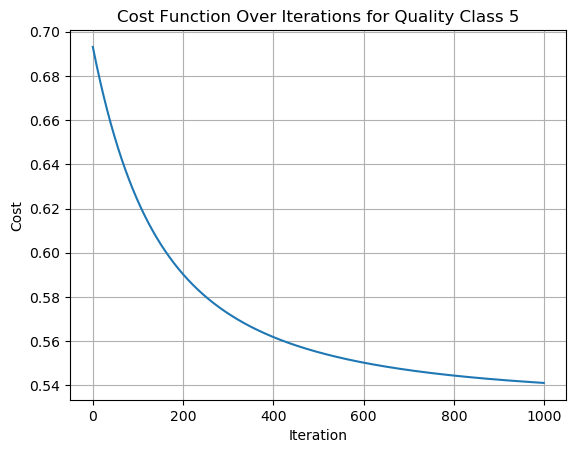

Accuracy: 0.6225


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

quality_classes = range(3, 9)

data = pd.read_csv('~/Downloads/winequality-red.csv')

for quality_class in range(3, 9):
    data[f'quality_{quality_class}'] = 1 * (data['quality'] == quality_class)

X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
          'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
Y = data[[f'quality_{quality_class}' for quality_class in range(3,9)]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=605,test_size=0.25)
#print(Y_test.values.argmax(axis=1))
#print(Y_test.values)
def z_score_normalization(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_normalized = (X - mean) / std
    return X_normalized

X_train_normalized = z_score_normalization(X_train)
X_test_normalized = z_score_normalization(X_test)

# Add bias term
X_train_normalized_bias = np.c_[np.ones((X_train_normalized.shape[0], 1)), X_train_normalized]
X_test_normalized_bias = np.c_[np.ones((X_test_normalized.shape[0], 1)), X_test_normalized]

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression function with explicit cost function and gradient calculation
def logistic_regression(X, Y, theta, learning_rate, iterations):
    m = len(Y)
    COST=[]
    for _ in range(iterations):
        z = X @ theta
        h = sigmoid(z)
        cost = -1/m * np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h))
        COST.append(cost)  
        gradient = X.T @ (h - Y) / m
        theta -= learning_rate * gradient
        
    return theta, COST

models = {}
cost_dict={}
for quality_class in quality_classes:
    theta = np.zeros(X_train_normalized_bias.shape[1])
    learning_rate = 0.01
    iterations = 1000
    trained_theta, COST = logistic_regression(X_train_normalized_bias, Y_train[f'quality_{quality_class}'].values, theta, learning_rate, iterations)
    models[quality_class] = trained_theta
    cost_dict[quality_class] = COST

#  cost function for quality class 5
plt.plot(cost_dict[5])
plt.title('Cost Function Over Iterations for Quality Class 5')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)
plt.show()


predictions = np.zeros((X_test_normalized_bias.shape[0], 6))
for quality_class in quality_classes:
    i = quality_class - 3
    for j in range(X_test_normalized_bias.shape[0]):
        predictions[j, i] = sigmoid(X_test_normalized_bias[j] @ models[quality_class])

predicted_labels = []
for k in range(predictions.shape[0]):
    sample_probs = predictions[k]
    predicted_labels.append(quality_classes[np.argmax(sample_probs)])

#print(predicted_labels)
#print("Shape of Y_test.values:", Y_test.values.shape)
#print("Length of predicted_labels:", len(predicted_labels))

accuracy = accuracy_score(Y_test.values.argmax(axis=1)+3, predicted_labels)
#accuracy = accuracy_score(Y_test.values, predicted_labels)

print("Accuracy:", accuracy)
